In [1]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [2]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [3]:
# Mnist digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    # not mnist dir or mnist is empty dir
    DOWNLOAD_MNIST = True

In [4]:
train_data = torchvision.datasets.MNIST(  # 训练数据集
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    
    download=DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


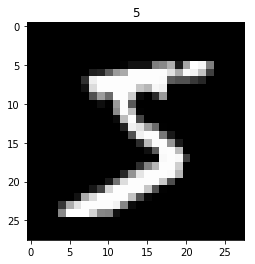

In [5]:
# plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [6]:
# Data Loader for easy mini_batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
# pick 2000 samples to speed up testring
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)  # 测试数据集
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255. # shape from (2000, 28, 28) to (2000, 1, 28, 28)
test_y = test_data.test_labels[:2000]

D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(    # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,         # input height
                out_channels=16,       # n_filters
                kernel_size=5,         # filter size
                stride=1,              # filter movement/step
                padding=2,             # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                         # output shape (16, 28, 28)
            nn.ReLU(),                 # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2), # out shape (32, 14, 14)
            nn.ReLU(),                  # activation
            nn.MaxPool2d(2),            # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)    # fully connected layer, output 10 classes
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)  # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [9]:
cnn = CNN()
print(cnn) # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [10]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR) # optimizer all cnn parameters
loss_func = nn.CrossEntropyLoss()                     # the target label is not one-hotted

In [11]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layers visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('visualize last layer'); plt.show(); #plt.pause(0.01)

Epoch:  0 | train loss: 2.2958 |test accuracy: 0.12


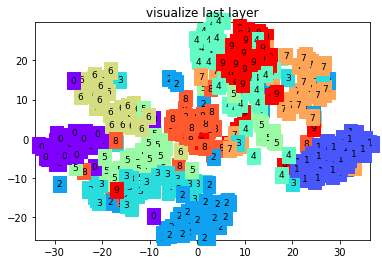

Epoch:  0 | train loss: 0.7521 |test accuracy: 0.83


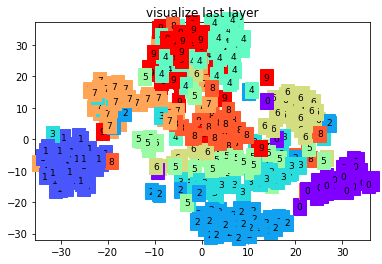

Epoch:  0 | train loss: 0.3039 |test accuracy: 0.89


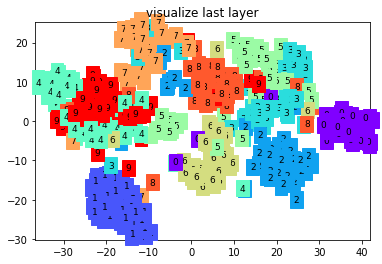

Epoch:  0 | train loss: 0.2692 |test accuracy: 0.91


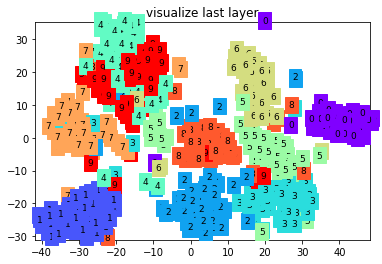

Epoch:  0 | train loss: 0.2305 |test accuracy: 0.94


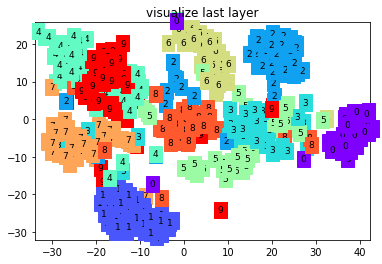

Epoch:  0 | train loss: 0.1290 |test accuracy: 0.95


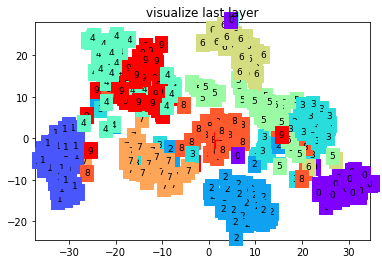

Epoch:  0 | train loss: 0.0575 |test accuracy: 0.95


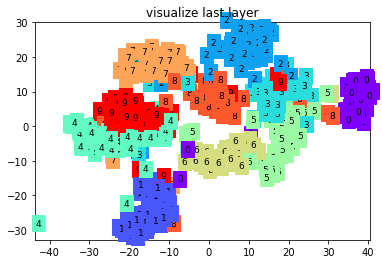

Epoch:  0 | train loss: 0.2057 |test accuracy: 0.95


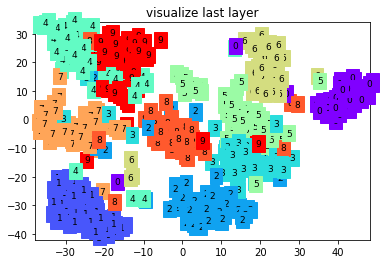

Epoch:  0 | train loss: 0.0950 |test accuracy: 0.95


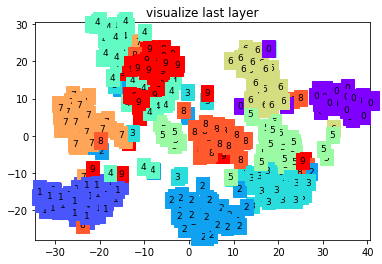

Epoch:  0 | train loss: 0.0681 |test accuracy: 0.95


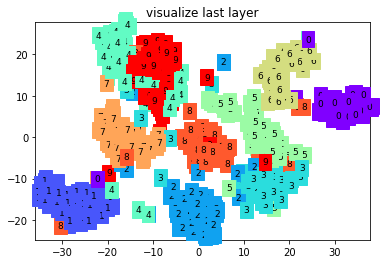

Epoch:  0 | train loss: 0.1233 |test accuracy: 0.97


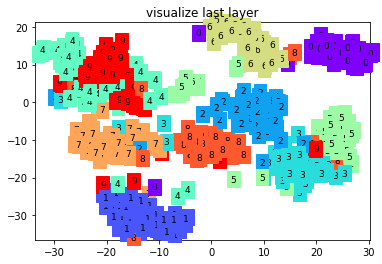

Epoch:  0 | train loss: 0.0703 |test accuracy: 0.97


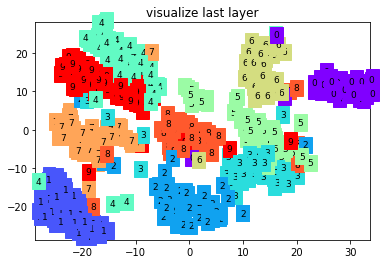

Epoch:  0 | train loss: 0.0769 |test accuracy: 0.97


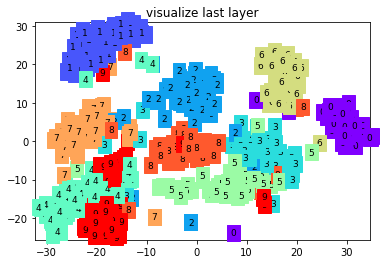

Epoch:  0 | train loss: 0.0158 |test accuracy: 0.97


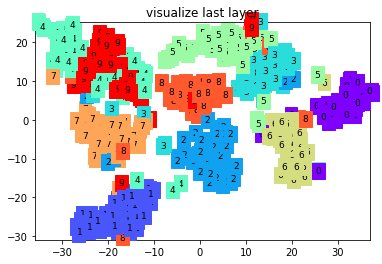

Epoch:  0 | train loss: 0.0429 |test accuracy: 0.97


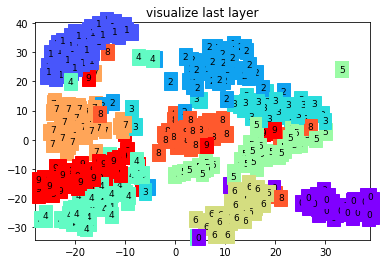

Epoch:  0 | train loss: 0.2194 |test accuracy: 0.97


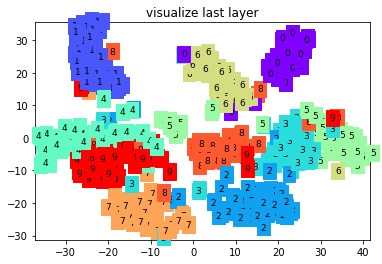

In [ ]:
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):    # gives batch size, normalize x when iterate train_loader
        
        output = cnn(b_x)[0]             # cnn output
        
        loss = loss_func(output, b_y) # compute loss for every net
        optimizer.zero_grad()         # clear gradients for next train
        loss.backward()               # backpropagation, compute gradients
        optimizer.step()              # apply gradients
        
        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '|test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visulization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

In [ ]:
# print 10 predictions fron test data
test_output, _ =cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')